In [1]:
import meta
import numpy as np
from bisect import bisect
from scipy import linalg
from functools import partial
from meta_functions import td_bath_coupling
#---------------
# analysis.py 
# Provides functions for analysis of
# the Redfield quantum master equation and its solution.
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
import matplotlib.pyplot as plt


In [10]:
def S(sval, LF_noise):
	def S_func_HF(w):
		if abs(w) > meta.BATH_CUTOFF_FREQ:
			return 0.0
		elif w != 0:
			num = td_bath_coupling(sval) * w
			den = 1 - np.exp(-meta.BETA * w)
			return num / den
		else:
			return td_bath_coupling(sval) / meta.BETA

	def S_func_LF(w):
		if abs(w) > meta.BATH_CUTOFF_FREQ:
			return 0.0
		elif w != 0:
			num = meta.BETA * (meta.LF_BATH_COUPLING)**2 * 4 * (meta.PERSISTENT_CURRENT)**2
			den = meta.HBAR**2 * (1 - np.exp(-meta.BETA * np.abs(w)))
			return num / den
		else:
			return td_bath_coupling(sval) / meta.BETA

	if not LF_noise:
		def S_func(w):
			return S_func_HF(w)
	elif LF_noise:
		def S_func(w):
			return S_func_LF(w) + S_func_HF(w)
	return S_func

In [11]:
f = S(1, 1)

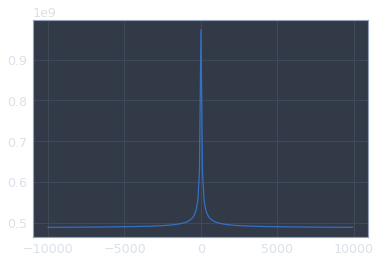

In [12]:
x = np.arange(-10**4, 10**4, 10**2)
y = map(f, x)

plt.plot(x, y)
plt.show()